 Part 1: Data Loading and Basic Python Operations
    1. Import necessary libraries (numpy, pandas, matplotlib, seaborn)
    2. Load the dataset using pandas
    3. Create functions to:
        ○ Calculate the average balance for different age groups
        ○ Countcustomers by country using dictionaries

In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# Read the data frame
df = pd.read_csv('D:/NanoLink-iData-Training/Python/Churn_Modelling.csv', delimiter=',')
df.shape

(10000, 14)

In [3]:
def calculate_age_group_balance(df):
    # Create age groups using conditional statements
    df['age_group'] = None
    
    for idx in df.index:
        age = df.loc[idx, 'Age']
        if age < 30:
            df.loc[idx, 'age_group'] = 'Young'
        elif age < 50:
            df.loc[idx, 'age_group'] = 'Middle-aged'
        else:
            df.loc[idx, 'age_group'] = 'Senior'
    
    # Calculate the average balance for each age group
    return df.groupby('age_group')['Balance'].mean()

In [57]:
# Calculate average balance by age group
age_group_balance = calculate_age_group_balance(df)
print(age_group_balance)

age_group
Middle-aged    76352.768688
Senior         80429.114308
Young          73698.718635
Name: Balance, dtype: float64


In [4]:
def count_customers_by_country(df):
    country_counts = {}

    # Iterate over the 'country' column and count occurrences
    for country in df['Geography']:
        if country in country_counts:
            country_counts[country] += 1
        else:
            country_counts[country] = 1
            
    return country_counts

# Count customers by country
country_counts = count_customers_by_country(df)

# Print the results
print("Number of customers by country:")
for country, count in country_counts.items():
    print(f"{country}: {count}")

Number of customers by country:
France: 5014
Spain: 2477
Germany: 2509


Part 2: Data Structure Manipulation
    1. Create lists of churned and retained customers
    2. Use list comprehension to filter high-value customers (balance > 100,000)
    3. Create a dictionary with customer statistics by country

In [5]:
# 1. Create lists of churned and retained customers
churned_customers = df[df['Exited'] == 1].to_dict(orient='records')
retained_customers = df[df['Exited'] == 0].to_dict(orient='records')

# Convert lists to DataFrames for better visualization
churned_df = pd.DataFrame(churned_customers)
retained_df = pd.DataFrame(retained_customers)

# Output the results in table format
print("Churned Customers:")
print(churned_df)

print("\nRetained Customers:")
print(retained_df)

Churned Customers:
      RowNumber  CustomerId                  Surname  CreditScore Geography  \
0             1    15634602                 Hargrave          619    France   
1             3    15619304                     Onio          502    France   
2             6    15574012                      Chu          645     Spain   
3             8    15656148                   Obinna          376   Germany   
4            17    15737452                    Romeo          653   Germany   
5            23    15699309                Gerasimov          510     Spain   
6            31    15589475                  Azikiwe          591     Spain   
7            36    15794171                 Lombardo          475    France   
8            42    15738148                   Clarke          465    France   
9            44    15755196                   Lavine          834    France   
10           47    15602280                   Martin          829   Germany   
11           48    15771573      

In [6]:
# 2. Use list comprehension to filter high-value customers (balance > 100,000)
high_value_customers = [customer for customer in df.to_dict(orient='records') if customer['Balance'] > 100000]
high_value_df = pd.DataFrame(high_value_customers)

# Output the results in table format
print("\nHigh-Value Customers:")
print(high_value_df)


High-Value Customers:
      RowNumber  CustomerId              Surname  CreditScore Geography  \
0             3    15619304                 Onio          502    France   
1             5    15737888             Mitchell          850     Spain   
2             6    15574012                  Chu          645     Spain   
3             8    15656148               Obinna          376   Germany   
4             9    15792365                   He          501    France   
5            10    15592389                   H?          684    France   
6            11    15767821               Bearce          528    France   
7            16    15643966              Goforth          616   Germany   
8            17    15737452                Romeo          653   Germany   
9            27    15736816                Young          756   Germany   
10           29    15728693           McWilliams          574   Germany   
11           33    15750181            Sanderson          553   Germany   
12

In [7]:
# 3. Create a dictionary to hold statistics by country
country_stats = {
    country: {
        'avg_balance': df[df['Geography'] == country]['Balance'].mean(),
        'churn_rate': df[df['Geography'] == country]['Exited'].mean() * 100
    }
    for country in df['Geography'].unique()
}

# Convert the dictionary to a DataFrame for better readability
country_stats_df = pd.DataFrame.from_dict(country_stats, orient='index')

# Output the results
print("Customer Statistics by Country:")
print(country_stats_df)

Customer Statistics by Country:
           avg_balance  churn_rate
France    62092.636516   16.154767
Spain     61818.147763   16.673395
Germany  119730.116134   32.443204


In [9]:
 #Part 3: Data Cleaning and Preparation

def prepare_data(df):
    # 1. Check for missing values
    print("Missing values before handling:")
    print(df.isnull().sum())    
    # Handle missing values
    df['Balance'] = df['Balance'].fillna(True).mean()
    #df['Balance'].fillna(df['Balance'].mean(), inplace=True)
    #'df.method({col: value}, inplace=True)' 
    
    # You can handle other columns similarly if needed, for example:
    # 2. Create new features
    df['balance_per_product'] = df['Balance'] / df['NumOfProducts']
    df['is_high_value'] = df['Balance'] > df['Balance'].mean()

    # 3. Convert categorical variables to numerical
    df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)

    return df

# Prepare the data
prepared_df = prepare_data(df)

# Display the first few rows of the prepared DataFrame
print("\nPrepared DataFrame:")
print(prepared_df.head())

Missing values before handling:
RowNumber              0
CustomerId             0
Surname                0
CreditScore            0
Geography              0
Gender                 0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
balance_per_product    0
is_high_value          0
dtype: int64

Prepared DataFrame:
   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure       Balance  \
0          1    15634602  Hargrave          619   42       2  76485.889288   
1          2    15647311      Hill          608   41       1  76485.889288   
2          3    15619304      Onio          502   42       8  76485.889288   
3          4    15701354      Boni          699   39       1  76485.889288   
4          5    15737888  Mitchell          850   43       2  76485.889288   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exi

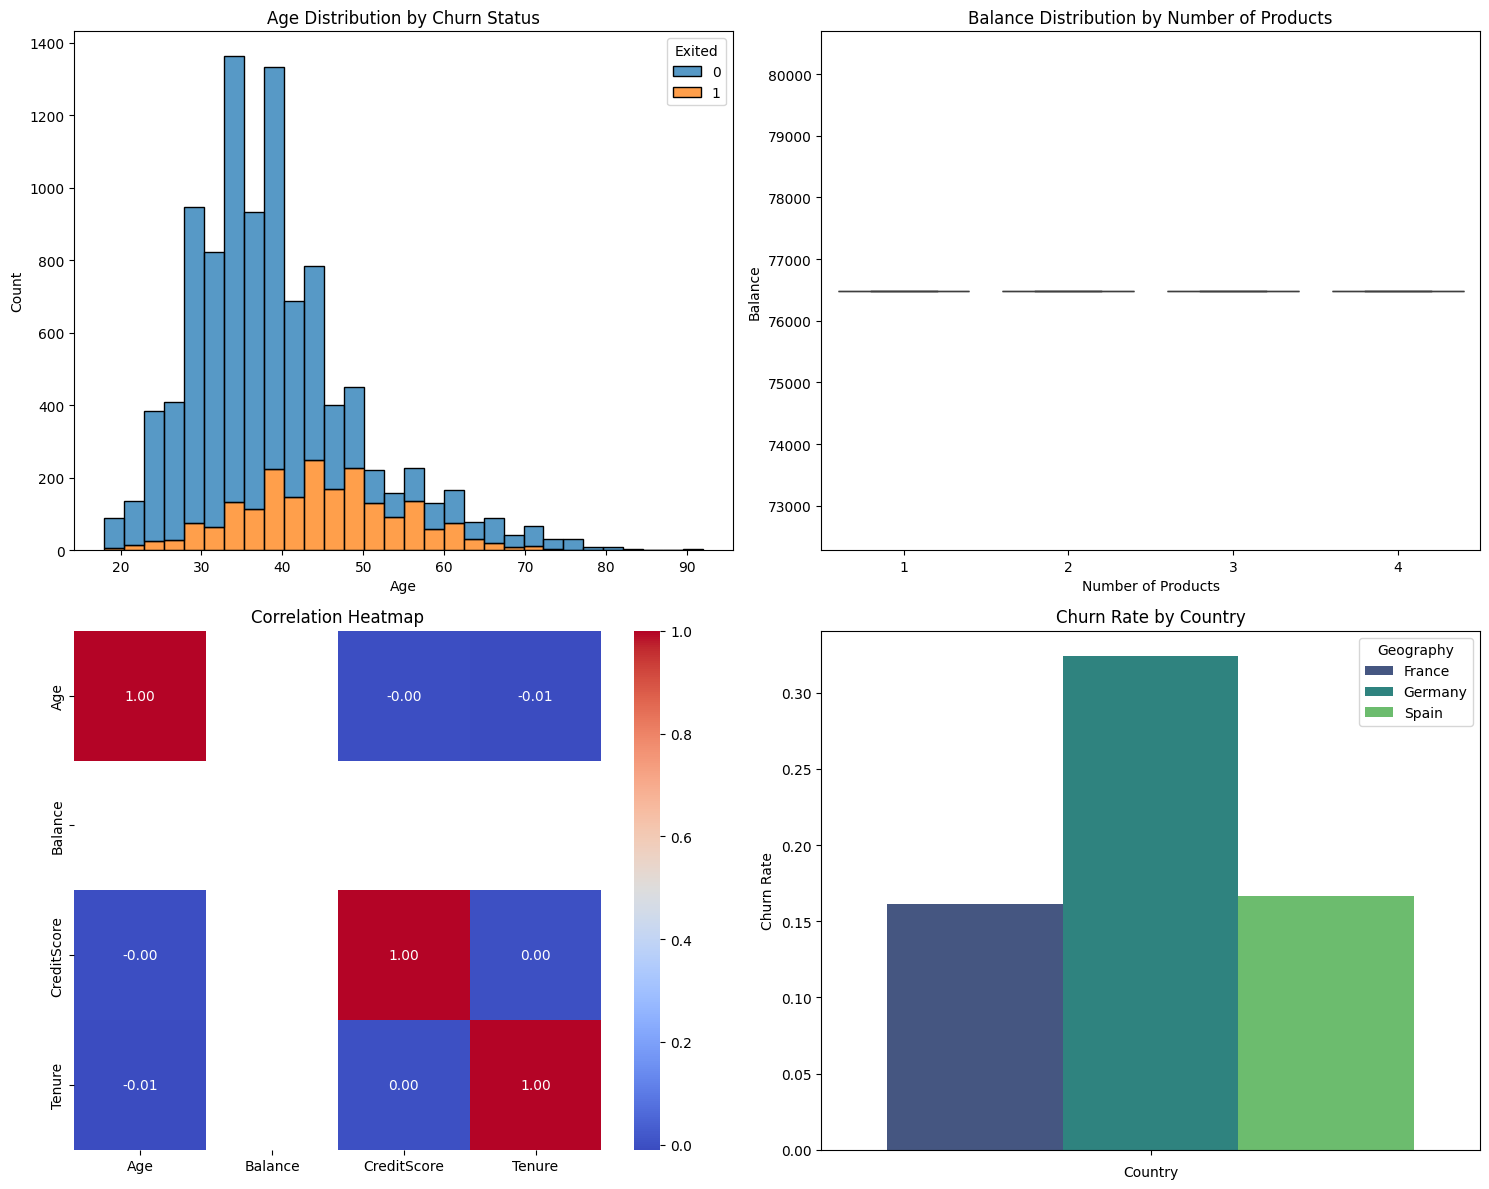

In [10]:
#Part 4: Exploratory Data Analysis and Visualization

# Function to create visualizations
def create_visualizations(df):
    # Set up the matplotlib figure
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Histogram of customer ages
    sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', ax=axes[0, 0], bins=30)
    axes[0, 0].set_title('Age Distribution by Churn Status')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Count')
    
    # 2. Boxplot of balance distribution by product number
    sns.boxplot(data=df, x='NumOfProducts', y='Balance', ax=axes[0, 1])
    axes[0, 1].set_title('Balance Distribution by Number of Products')
    axes[0, 1].set_xlabel('Number of Products')
    axes[0, 1].set_ylabel('Balance')
    
    # 3. Correlation heatmap for numeric features
    numeric_cols = ['Age', 'Balance', 'CreditScore', 'Tenure']
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0])
    axes[1, 0].set_title('Correlation Heatmap')
    
    # 4. Barplot of churn rate by country
    churn_rate_by_country = df.groupby('Geography')['Exited'].mean().reset_index()
    sns.barplot(data=churn_rate_by_country, hue='Geography', y='Exited', ax=axes[1, 1], palette='viridis')
    axes[1, 1].set_title('Churn Rate by Country')
    axes[1, 1].set_xlabel('Country')
    axes[1, 1].set_ylabel('Churn Rate')
    
    plt.tight_layout()
    return fig

# Create visualizations
fig = create_visualizations(df)

# Show the plots
plt.show()

In [11]:
#Part 5: Basic Predictive Analysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
# Prepare features for modeling
def prepare_features(df):
    # Selecting relevant features
    features = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember']]
    target = df['Exited']
    
    return features, target

# Split data into training and testing sets
def split_data(features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Create a simple prediction model
def create_model(X_train, y_train):
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Logistic Regression Model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)
    
    return model, scaler

# Evaluate the model
def evaluate_model(model, X_test, y_test, scaler):
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Main workflow
features, target = prepare_features(df)
X_train, X_test, y_train, y_test = split_data(features, target)
model, scaler = create_model(X_train, y_train)
evaluate_model(model, X_test, y_test, scaler)

Confusion Matrix:
[[1576   31]
 [ 345   48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1607
           1       0.61      0.12      0.20       393

    accuracy                           0.81      2000
   macro avg       0.71      0.55      0.55      2000
weighted avg       0.78      0.81      0.76      2000

